In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_train = pd.read_csv("Desktop/Kaggle/train.csv")
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

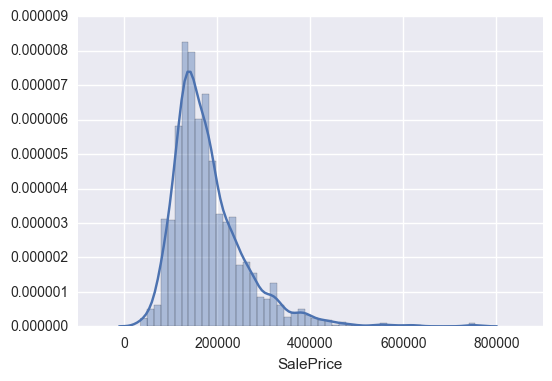

In [7]:
sns.distplot(df_train.SalePrice)

In [14]:
print ("Skewness: %.2f" %df_train.SalePrice.skew())
print("Kurtosis: %.2f" %df_train.SalePrice.kurt())

Skewness: 1.88
Kurtosis: 6.54


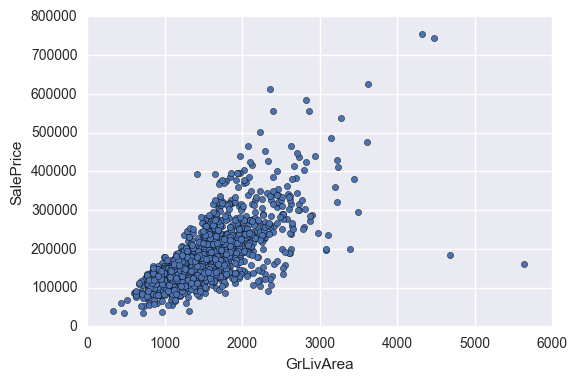

In [28]:
#data = pd.concat([df_train.GrLivArea, df_train.SalePrice], axis = 1)
df_train.plot.scatter(x = "GrLivArea", y= "SalePrice", ylim=(0,800000))

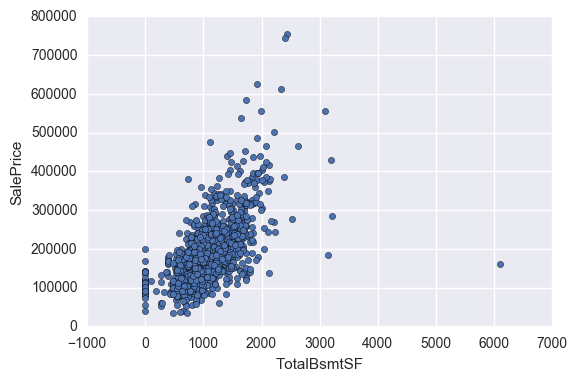

In [30]:
df_train.plot.scatter(x = "TotalBsmtSF", y= "SalePrice", ylim=(0,800000))

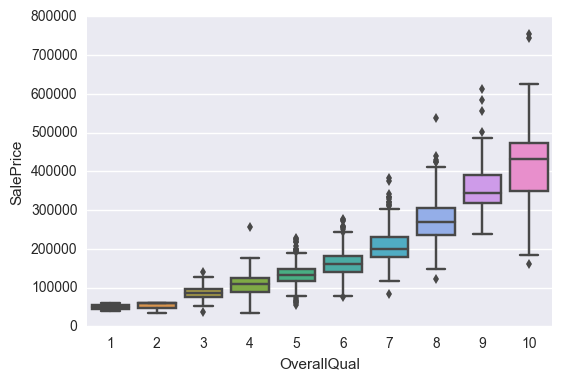

In [31]:
sns.boxplot(x = "OverallQual", y = "SalePrice", data= df_train)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

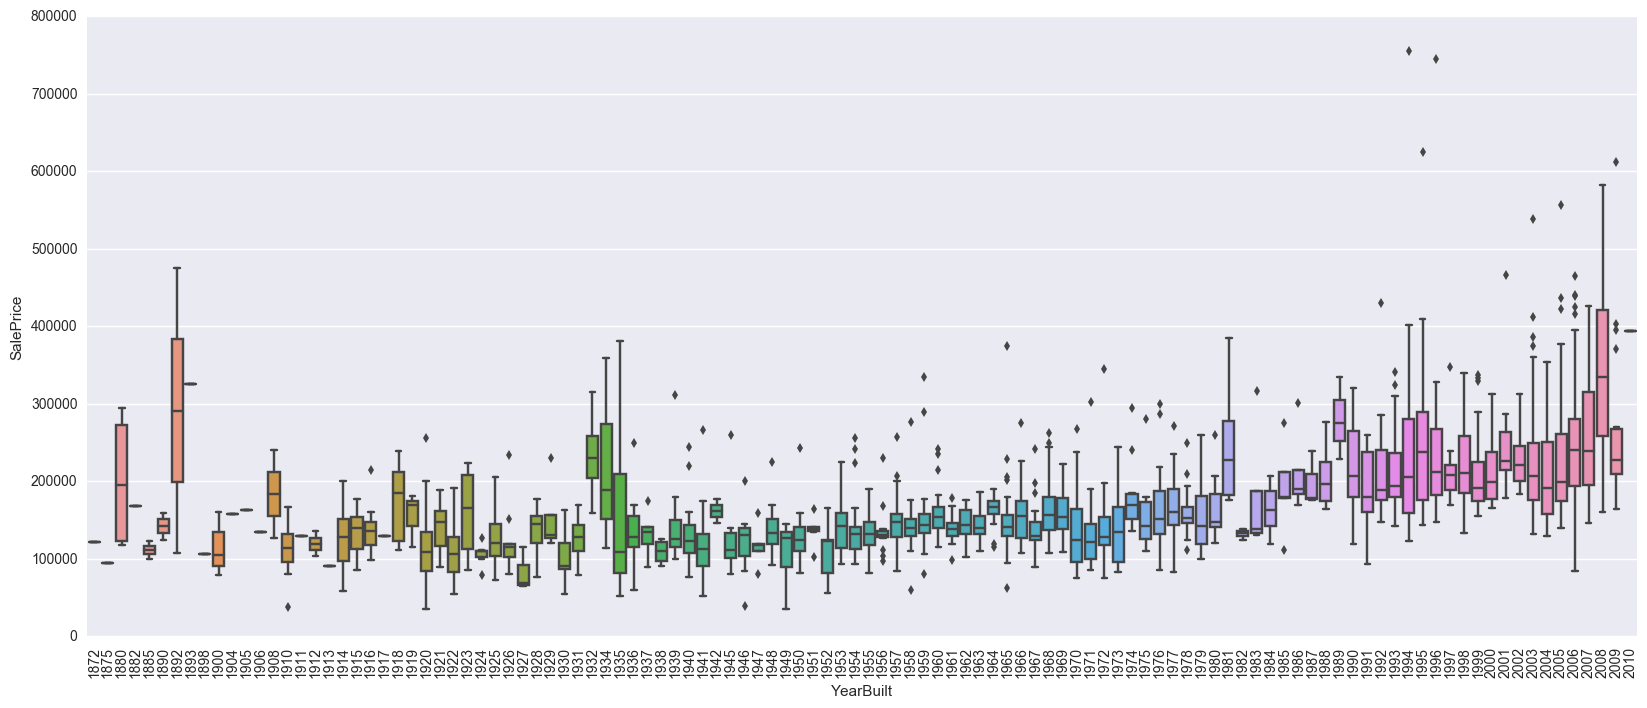

In [38]:
plt.subplots(figsize=(20, 8))
sns.boxplot(x = "YearBuilt", y = "SalePrice", data = df_train)
plt.xticks(rotation = 90)

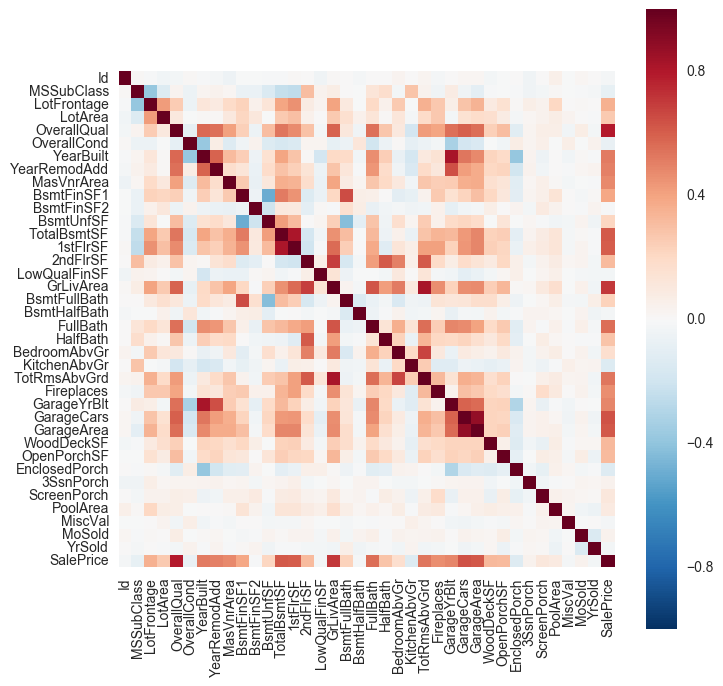

In [51]:
corrmax = df_train.corr()
plt.subplots(figsize = (8,8))
sns.heatmap(corrmax, square=True)

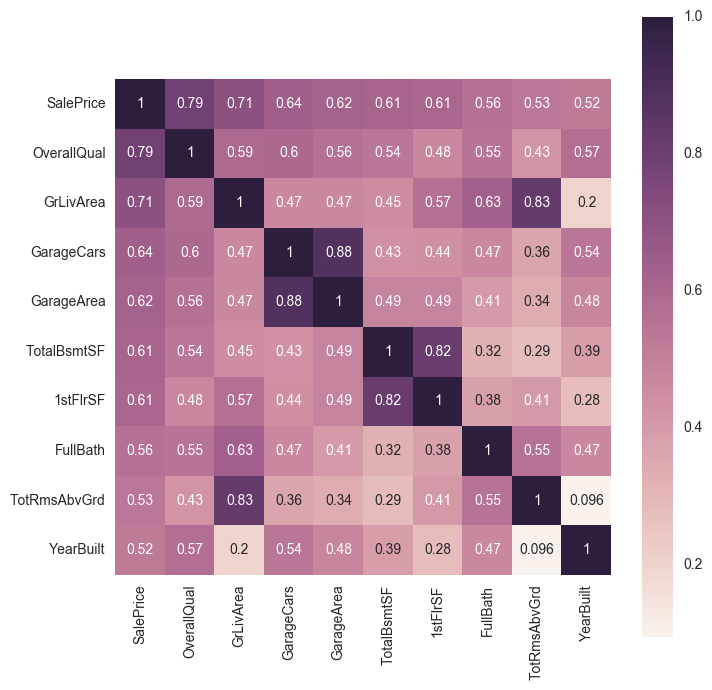

In [84]:
col = corrmax.nlargest(10, "SalePrice")["SalePrice"].index
col_T = np.corrcoef(df_train[col].T)
plt.subplots(figsize = (8,8))
sns.heatmap(col_T, cbar=True, square=True, annot= True, xticklabels= col, yticklabels= col)

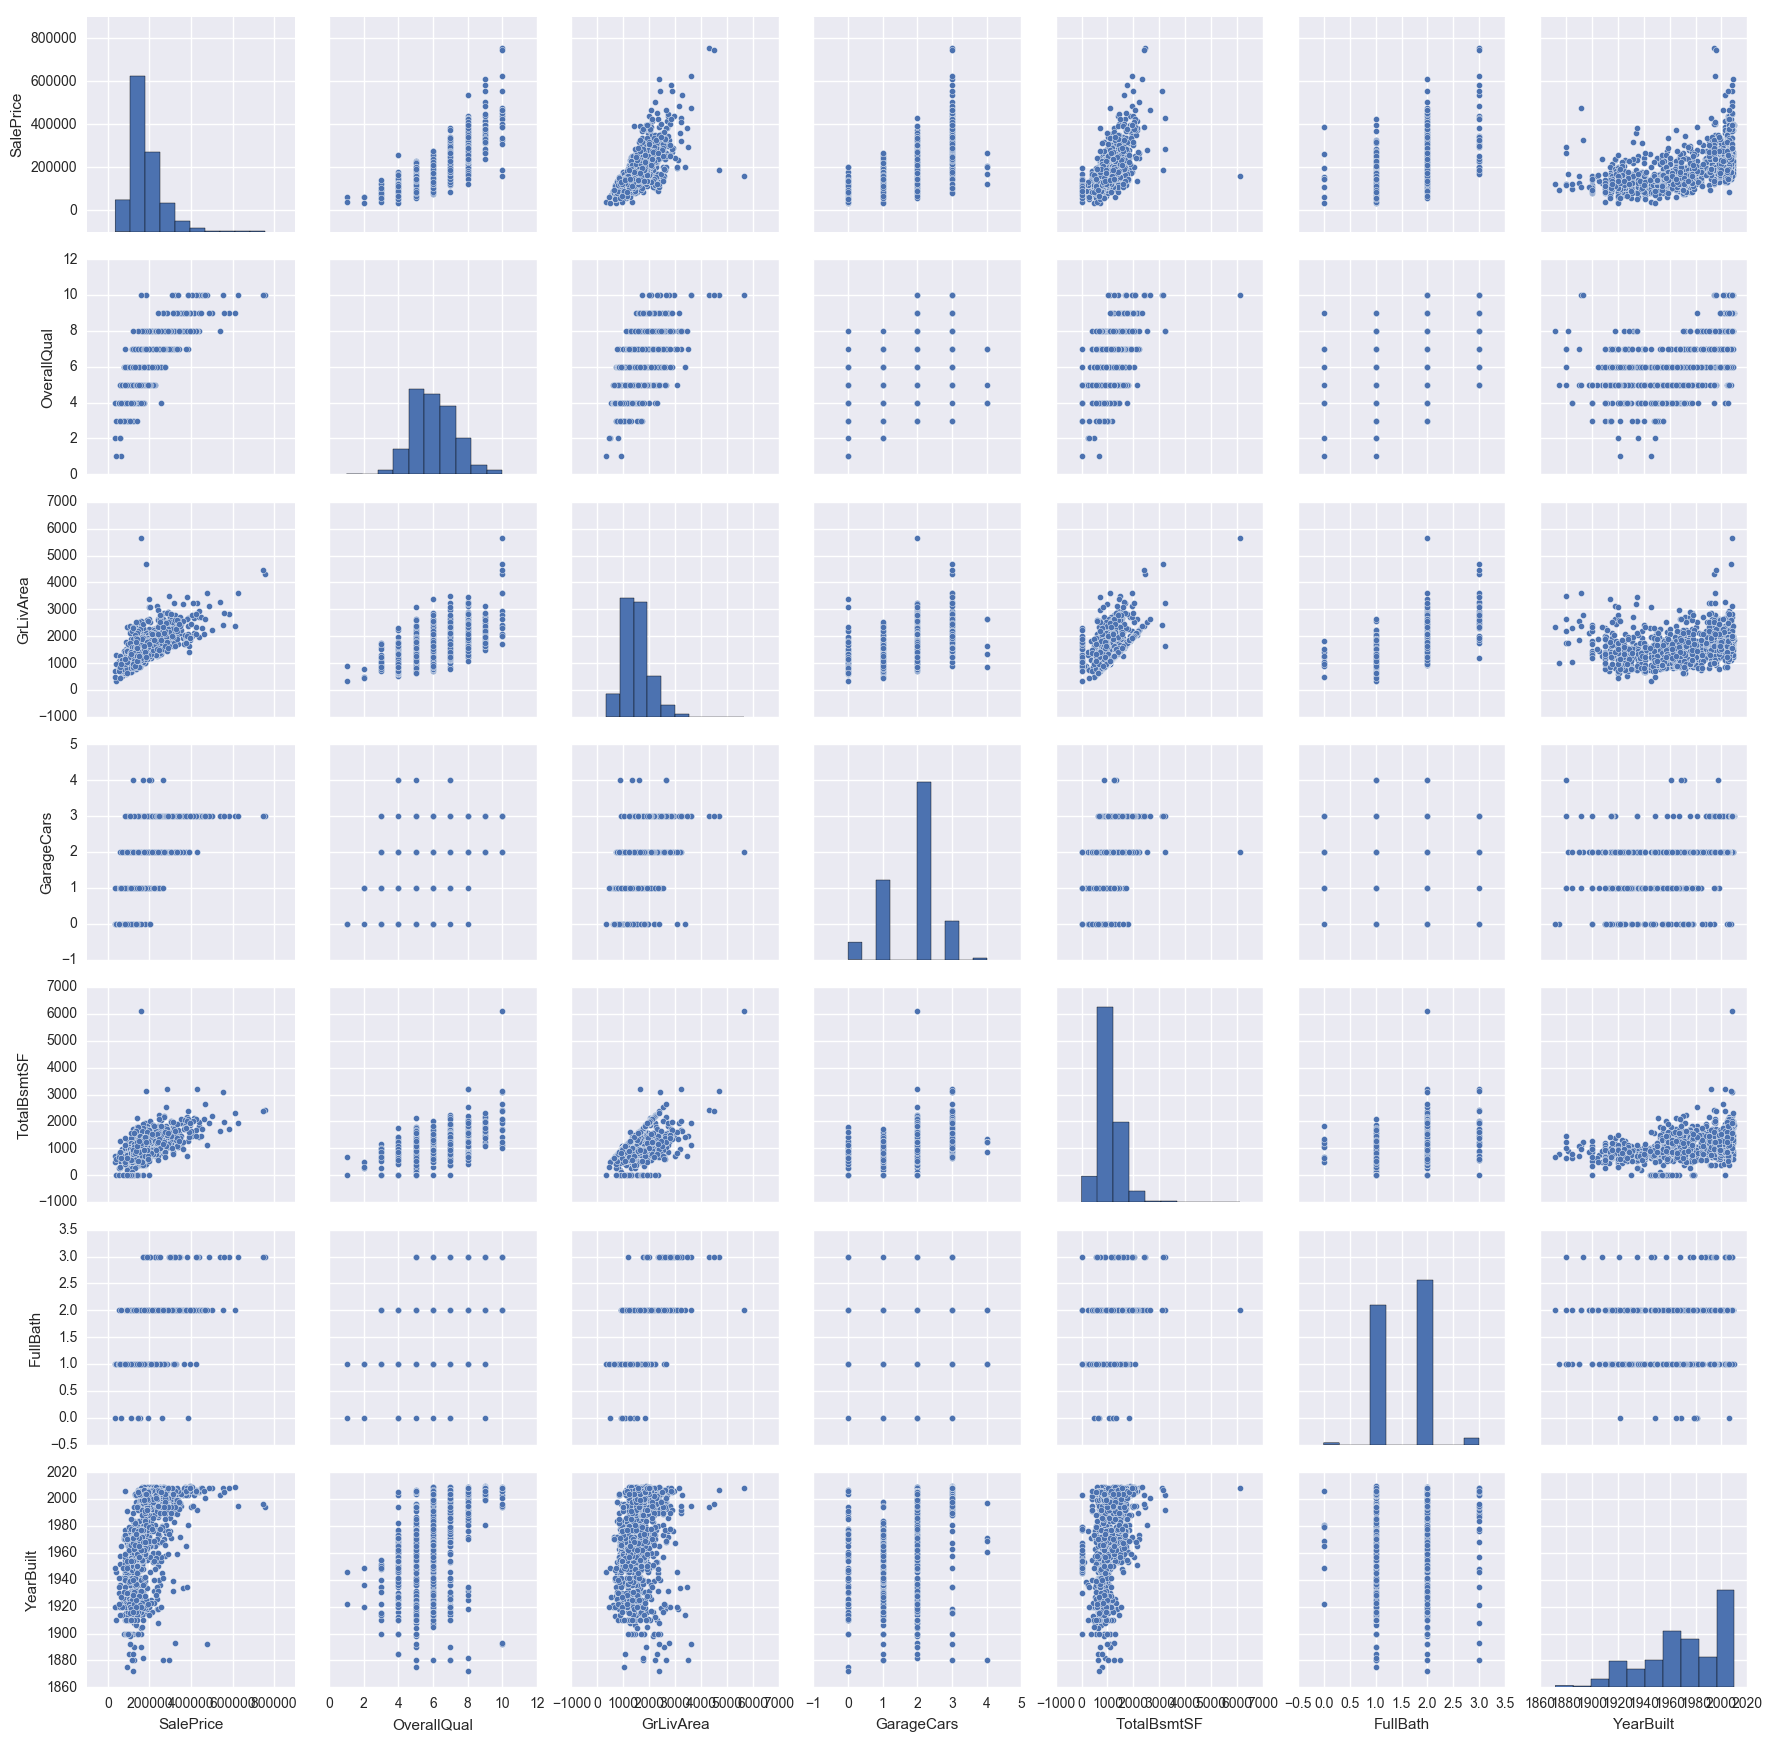

In [87]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])

In [106]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [122]:
df_train = df_train.drop(missing_data[missing_data["Total"] > 1].index, axis = 1)

In [125]:
df_train = df_train.drop(df_train[df_train["Electrical"].isnull()].index)

In [129]:
df_train.isnull().sum().max()

0

In [148]:
saleprice_scaled  = StandardScaler().fit_transform(df_train["SalePrice"][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

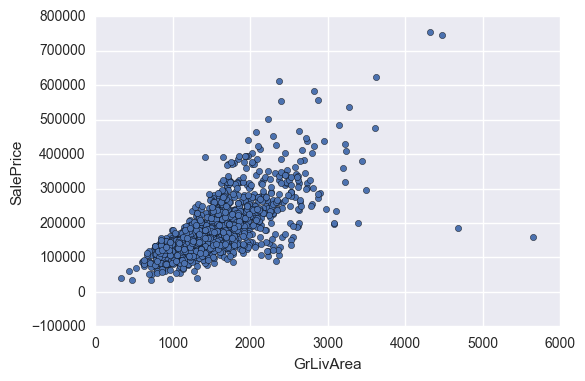

In [151]:
df_train.plot.scatter(x = "GrLivArea", y = "SalePrice")

In [167]:
df_train.sort_values(by = "GrLivArea", ascending=False)[:2]
df_train = df_train.drop(df_train[df_train["Id"]==1299].index)

In [169]:
df_train = df_train.drop(df_train[df_train["Id"]==524].index)

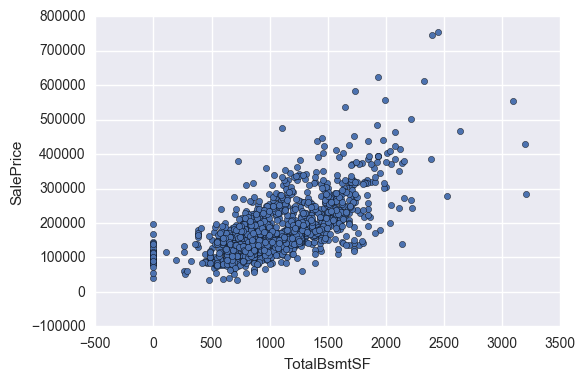

In [170]:
df_train.plot.scatter(x = "TotalBsmtSF", y = "SalePrice") 

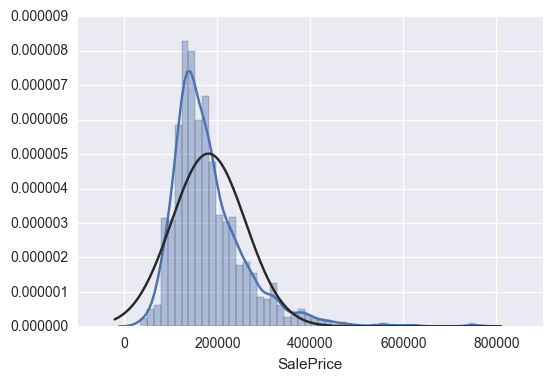

In [172]:
sns.distplot(df_train["SalePrice"], fit=norm)

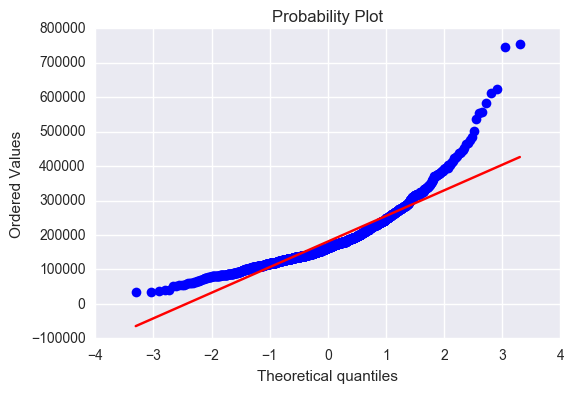

In [176]:
 res = stats.probplot(df_train['SalePrice'], plot=plt)

In [177]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])

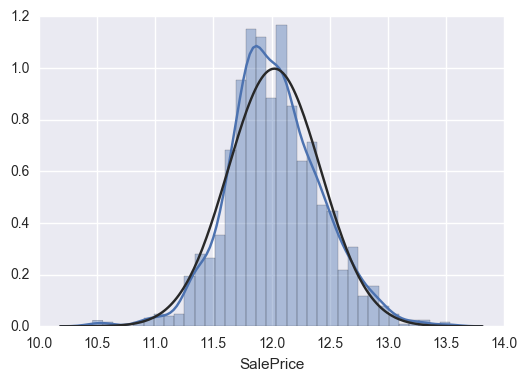

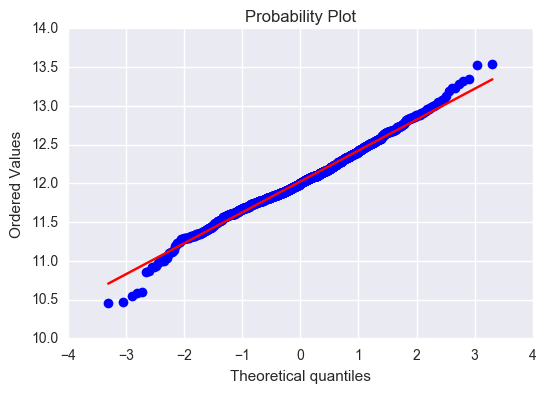

In [184]:
sns.distplot(df_train["SalePrice"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot = plt)

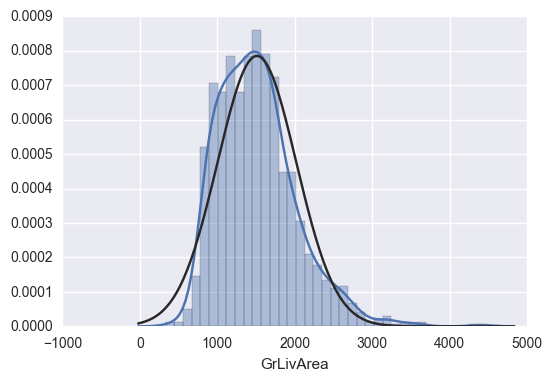

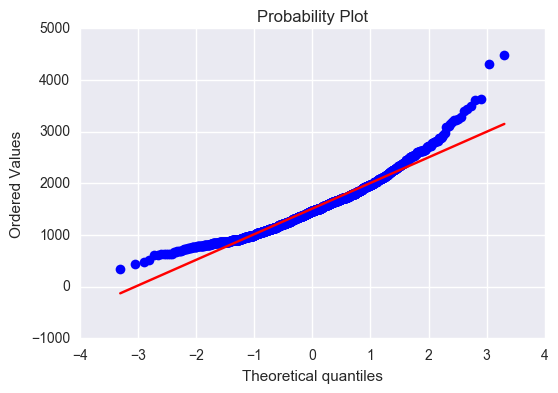

In [185]:
sns.distplot(df_train["GrLivArea"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["GrLivArea"], plot = plt)

In [187]:
df_train["GrLivArea"] = np.log(df_train["GrLivArea"])

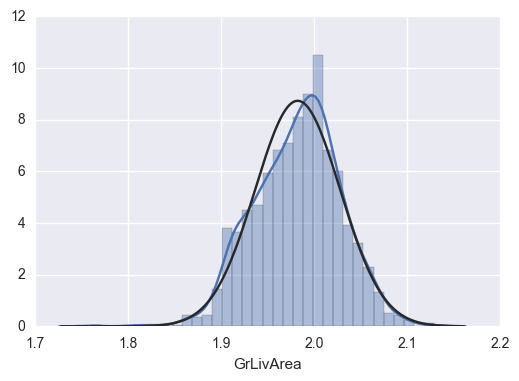

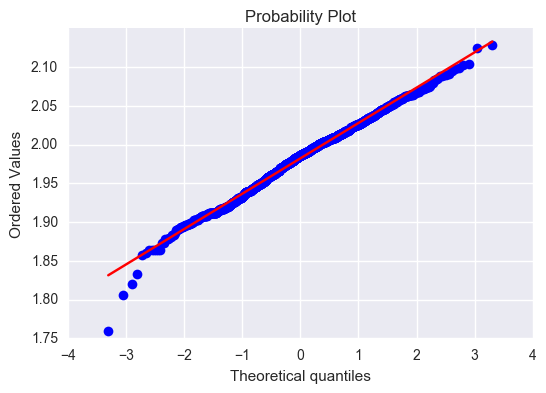

In [188]:
sns.distplot(df_train["GrLivArea"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["GrLivArea"], plot = plt)

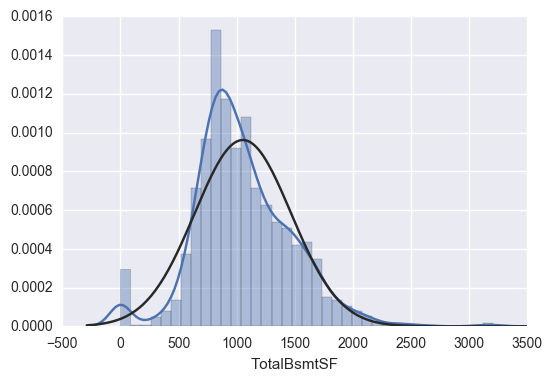

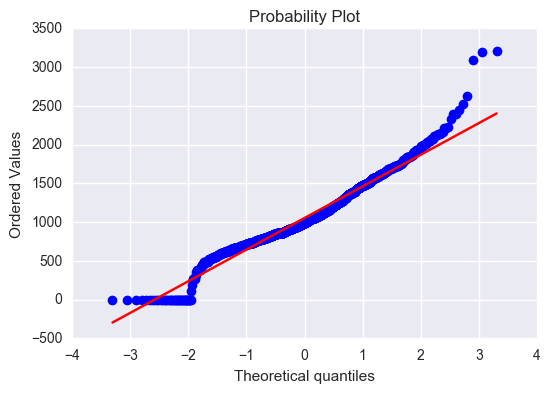

In [189]:
sns.distplot(df_train["TotalBsmtSF"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["TotalBsmtSF"], plot = plt)

In [209]:
df_train["HasBsmt"] = pd.Series(len(df_train["TotalBsmtSF"]))
df_train["HasBsmt"] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [210]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

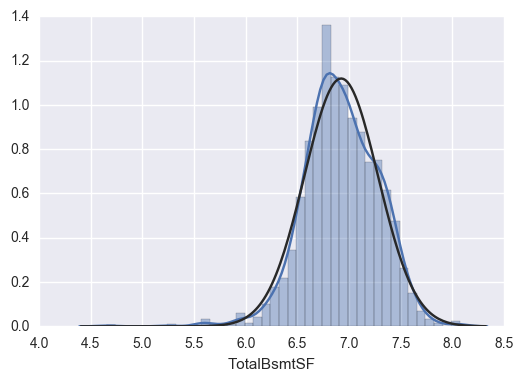

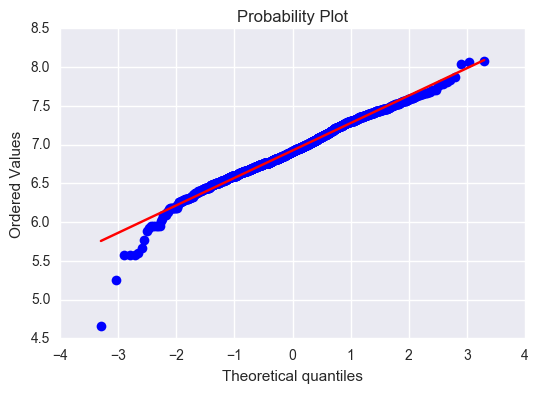

In [211]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [217]:
df = pd.get_dummies(df_train)
df.columns


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)